<a href="https://colab.research.google.com/github/schauppi/Udemy_Tensorflow/blob/schauppi/Convolutional_Neural_Networks/cnn_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = tf.keras.datasets.cifar10

In [15]:
(x_train, y_train), (x_test, y_test) = data.load_data()

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [17]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [18]:
#convert from 5000,1 to 5000, array
y_train, y_test = y_train.flatten(), y_test.flatten()

In [20]:
print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


In [21]:
input_data_shape = x_train[0].shape
print(input_data_shape)

(32, 32, 3)


In [23]:
classes = len(set(y_train))
print(classes)

10


In [30]:
i = keras.layers.Input(shape=input_data_shape)
x = keras.layers.Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = keras.layers.MaxPool2D(2,2)(x)
x = keras.layers.Conv2D(64, (3,3), strides=2, activation="relu")(x)
#x = keras.layers.MaxPool2D(2,2)(x)
x = keras.layers.Conv2D(128, (3,3), strides=2, activation="relu")(x)
#x = keras.layers.MaxPool2D(2,2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(64, activation="relu")(x)
x = keras.layers.Dense(classes, activation="softmax")(x)

model = keras.models.Model(i, x)

In [31]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0   

In [34]:
model.compile(metrics=["accuracy"], loss="sparse_categorical_crossentropy", optimizer="adam")

In [35]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 40s 6ms/step - loss: 2.0890 - accuracy: 0.1748 - val_loss: 1.6636 - val_accuracy: 0.3624
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7178 - accuracy: 0.3375 - val_loss: 1.5165 - val_accuracy: 0.4325
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6013 - accuracy: 0.4036 - val_loss: 1.4410 - val_accuracy: 0.4818
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5192 - accuracy: 0.4507 - val_loss: 1.3997 - val_accuracy: 0.4991
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4550 - accuracy: 0.4751 - val_loss: 1.3505 - val_accuracy: 0.5208
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4211 - accuracy: 0.4924 - val_loss: 1.3453 - val_accuracy: 0.5334
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3922 - accuracy: 0.5080 - val_loss: 1.3165 - val_ac

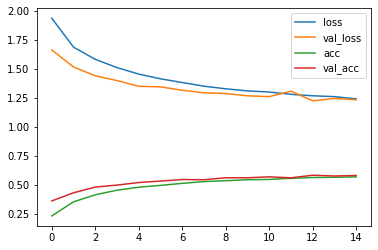

In [36]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

In [40]:
def plot_confusion_matrix(cm, classes, title="confusion_matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()


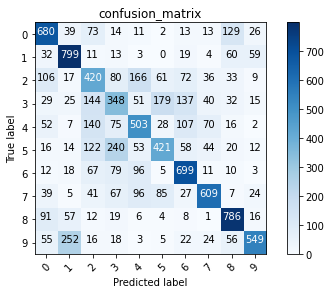

In [41]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [47]:
labels = '''airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck'''.split()

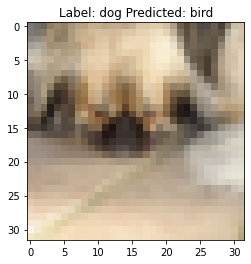

In [52]:
misclassified = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(32,32, 3))
plt.title("Label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));